## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai import *
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fastprogress'

In [ ]:
pwd

In [4]:
os.listdir("./data/kaggle/humanProtein")

['train.zip',
 'all.zip',
 'train.csv',
 'sample_submission.csv',
 'test',
 'test.zip',
 'train']

In [5]:
PATH = 'data/kaggle/humanProtein'

In [6]:
ls {PATH}

all.zip*                test/      train/      train.zip*
sample_submission.csv*  test.zip*  train.csv*


In [7]:
# !cp -r {PATH}/test {PATH}/valid
# !cp {PATH}/train.csv {PATH}/valid.csv

In [8]:
!ls {PATH}

all.zip  sample_submission.csv	test  test.zip	train  train.csv  train.zip


In [9]:
os.listdir(f'{PATH}/train')[:3]

['11a99126-bbbf-11e8-b2ba-ac1f6b6435d0_green.png',
 '430902d8-bbc9-11e8-b2bc-ac1f6b6435d0_yellow.png',
 'b8a3df50-bbbe-11e8-b2ba-ac1f6b6435d0_red.png']

{'data/kaggle/humanProtein/train/11a99126-bbbf-11e8-b2ba-ac1f6b6435d0_green.png'}


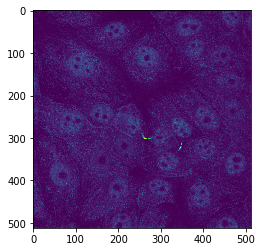

In [56]:
imgpath = os.path.join(f'{PATH}/train', os.listdir(f'{PATH}/train')[0])
print({imgpath})
img = Image.open(f'{imgpath}')
img = np.array(img)
plt.imshow(img)
plt.show()

In [10]:
# os.listdir(f'{PATH}/valid')[:3]

## Multi-label versus single-label classification

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

In [11]:
df = pd.read_csv(f'{PATH}/train.csv')

In [12]:
df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [32]:
df.Target

0           16 0
1        7 1 2 0
2              5
3              1
4             18
5              0
6           25 2
7              0
8            2 0
9              7
10            23
11            21
12          24 0
13            23
14           6 2
15            25
16          25 0
17            25
18             0
19         25 11
20       7 1 2 0
21            11
22          25 2
23          25 0
24          25 3
25          16 6
26          25 2
27            23
28            25
29          12 0
          ...   
31042    25 18 0
31043     25 2 0
31044          0
31045       11 0
31046          0
31047        7 0
31048          4
31049        3 0
31050       25 7
31051     19 2 0
31052       25 7
31053          0
31054          5
31055       25 0
31056     25 3 0
31057         25
31058          4
31059          0
31060         23
31061          0
31062      16 14
31063        5 0
31064      19 23
31065         18
31066       25 0
31067         21
31068          5
31069         

In [48]:
pd.

62144

In [14]:
tfms = get_transforms(do_flip=True)

In [83]:
data = ImageDataBunch.from_csv(PATH, folder='train', csv_labels='train.csv', valid_pct=1e-1, size=24, suffix='_green.png',
    ds_tfms=get_transforms(flip_vert=True))

In [84]:
data.normalize(vision.data.imagenet_stats)

In [85]:
data.batch_stats()

[tensor([-1.8788, -1.7913, -1.5611]), tensor([0.4377, 0.4475, 0.4455])]

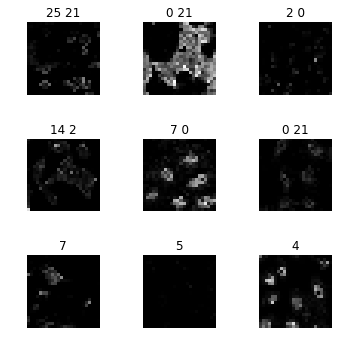

In [86]:
data.show_batch(rows=3, figsize=(5,5))

In [87]:
??ConvLearner

In [88]:
learn = ConvLearner(data, models.resnet18)

In [89]:
learn.lr_find()

In [100]:
learn.lr_range(slice(1e-1, 1e-3))

array([0.1  , 0.01 , 0.001])

In [101]:
learn.lr_find()

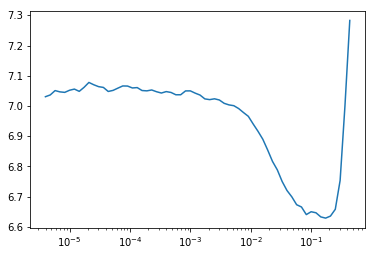

In [111]:
learn.recorder.plot(20, 7)

In [114]:
learn.fit_one_cycle(cyc_len=10, max_lr=1e-2)

Total time: 07:32
epoch  train loss  valid loss
1      4.184951    22.505091   (00:44)
2      4.239627    4.143334    (00:45)
3      4.254340    18.882498   (00:45)
4      4.270184    133.543274  (00:45)
5      4.202051    4.632618    (00:45)
6      4.213394    4.259530    (00:45)
7      4.145905    4.588336    (00:45)
8      4.101880    4.075448    (00:45)
9      4.080235    11.545257   (00:45)
10     4.068587    4.030572    (00:45)



In multi-label classification each sample can belong to one or more classes. In the previous example, the first images belongs to two classes: *haze* and *primary*. The second image belongs to four classes: *agriculture*, *clear*, *primary* and  *water*.

## Multi-label models for Planet dataset

In [5]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [6]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [7]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [9]:
data = get_data(256)

In [35]:
x,y = next(iter(data.val_dl))

In [36]:
y


    1     0     0  ...      0     1     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
[torch.FloatTensor of size 64x17]

In [37]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 1.0),
 ('water', 1.0)]

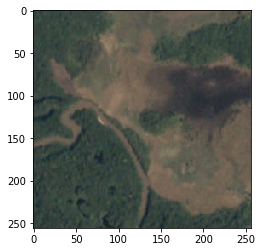

In [43]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [8]:
sz=64

In [9]:
data = get_data(sz)

In [10]:
data = data.resize(int(sz*1.3), 'tmp')

A Jupyter Widget

In [11]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

A Jupyter Widget

[ 0.       0.22404  0.31176  0.82044]                        



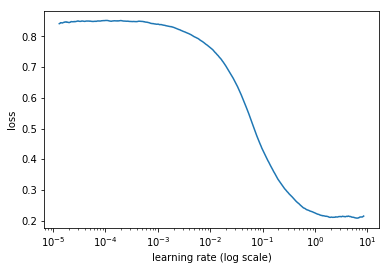

In [15]:
lrf=learn.lr_find()
learn.sched.plot()

In [12]:
lr = 0.2

In [13]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14882  0.13552  0.87878]                        
[ 1.       0.14237  0.13048  0.88251]                        
[ 2.       0.13675  0.12779  0.88796]                        
[ 3.       0.13528  0.12834  0.88419]                        
[ 4.       0.13428  0.12581  0.88879]                        
[ 5.       0.13237  0.12361  0.89141]                        
[ 6.       0.13179  0.12472  0.8896 ]                        



In [14]:
lrs = np.array([lr/9,lr/3,lr])

In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.12534  0.10926  0.90892]                        
[ 1.       0.12035  0.10086  0.91635]                        
[ 2.       0.11001  0.09792  0.91894]                        
[ 3.       0.1144   0.09972  0.91748]                        
[ 4.       0.11055  0.09617  0.92016]                        
[ 5.       0.10348  0.0935   0.92267]                        
[ 6.       0.10502  0.09345  0.92281]                        



In [19]:
learn.save(f'{sz}')

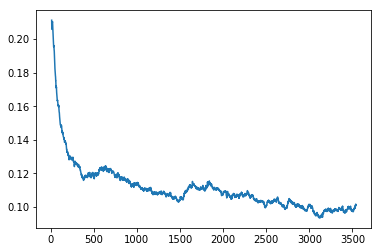

In [22]:
learn.sched.plot_loss()

In [20]:
sz=128

In [21]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.09729  0.09375  0.91885]                         
[ 1.       0.10118  0.09243  0.92075]                         
[ 2.       0.09805  0.09143  0.92235]                         
[ 3.       0.09834  0.09134  0.92263]                         
[ 4.       0.096    0.09046  0.9231 ]                         
[ 5.       0.09584  0.09035  0.92403]                         
[ 6.       0.09262  0.09059  0.92358]                         



In [22]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.09623  0.08693  0.92696]                         
[ 1.       0.09371  0.08621  0.92887]                         
[ 2.       0.08919  0.08296  0.93113]                         
[ 3.       0.09221  0.08579  0.92709]                         
[ 4.       0.08994  0.08575  0.92862]                         
[ 5.       0.08729  0.08248  0.93108]                         
[ 6.       0.08218  0.08315  0.92971]                         



In [23]:
sz=256

In [24]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.09161  0.08651  0.92712]                         
[ 1.       0.08933  0.08665  0.92677]                         
[ 2.       0.09125  0.08584  0.92719]                         
[ 3.       0.08732  0.08532  0.92812]                         
[ 4.       0.08736  0.08479  0.92854]                         
[ 5.       0.08807  0.08471  0.92835]                         
[ 6.       0.08942  0.08448  0.9289 ]                         



In [25]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.08932  0.08218  0.9324 ]                         
[ 1.       0.08654  0.08195  0.93313]                         
[ 2.       0.08468  0.08024  0.93391]                         
[ 3.       0.08596  0.08141  0.93287]                         
[ 4.       0.08211  0.08152  0.93401]                         
[ 5.       0.07971  0.08001  0.93377]                         
[ 6.       0.07928  0.0792   0.93554]                         



In [26]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
f2(preds,y)

0.93626519738612801

### End